In [1]:
#import all required libraries
import pandas as pd 
import numpy as np
import json
from matplotlib import pyplot as plt

In [2]:
#read the data
credits_df=pd.read_csv('../dataset/tmdb_5000_credits.csv')
movies_df=pd.read_csv('../dataset/tmdb_5000_movies.csv')

In [3]:
#print all the columns of the dataframe
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [4]:
#display the first 2 rows of the dataframe
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
#display first 5 rows of the credits dataframe
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
#Now, we will merge the two dataframes on id column


#rename movie_id of credits_df to id
credits_df.rename(columns={'movie_id':'id'},inplace=True)

#now merge the two dataframes on id column

movies_df=pd.merge(movies_df,credits_df,on='id')

In [7]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [8]:
#Let us do some EDA to understand the data better before we start building the recommender systems
#list all the columns of the dataframe
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [9]:
#describe the dataframe
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [10]:
#check the null values in any column of the dataframe
movies_df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64

we have many null values in homepage column and tagline column. We will drop them.

We do not need homepage column in either EDA or modelling.
We might need tagline column in modelling content based filtering.

There are two null values in runtime, which can be replaced with average runtime

In [11]:
#drop homepage and tagline columns
eda_df=movies_df.drop(columns=['homepage','tagline'])
#fill null values in the runtime column with average runtime
eda_df['runtime'].fillna(eda_df['runtime'].mean(),inplace=True)
eda_df.dropna(inplace=True)
eda_df.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title_x                 0
vote_average            0
vote_count              0
title_y                 0
cast                    0
crew                    0
dtype: int64

In [12]:
#we will check for any duplicates in the dataset
movies_df.duplicated().sum()

0

In [13]:
#we will check the data types of the columns
movies_df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_x                  object
vote_average            float64
vote_count                int64
title_y                  object
cast                     object
crew                     object
dtype: object

In [14]:
# we can convert the release_date column to datetime format
movies_df['release_date']=pd.to_datetime(movies_df['release_date'])

<BarContainer object of 19 artists>

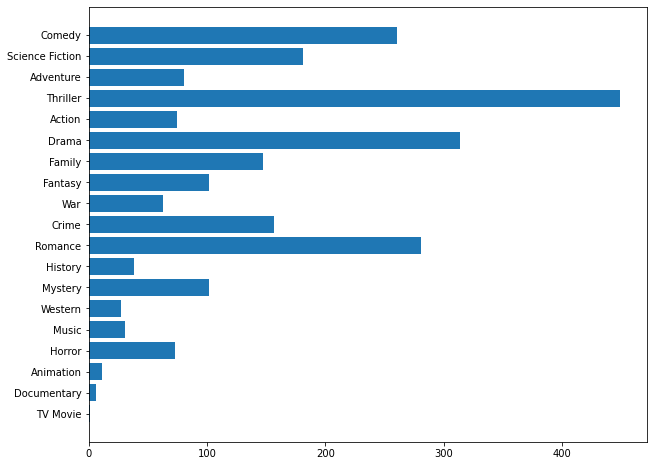

In [15]:
#let us plot some graphs to understand the data better
#we will first find which geners are most popular over the years
z = list()
sorted_popularity = eda_df.sort_values(by = 'popularity',ascending= False)
counter = 0
for i in sorted_popularity['genres'] :
    i = json.loads(i)
    for dic in i :
        dict(dic)
    z.append(dic.get('name'))
    counter +=1
    if counter >=sorted_popularity['genres'].shape[0]/2 :
        break
unique_genres = set(z)
counts = dict()
for i in z:
    counts[i] = counts.get(i, 0) + 1 
plt.subplots(figsize=(10,8))
plt.gca().invert_yaxis()
plt.barh(list(counts.keys()),list(counts.values()))

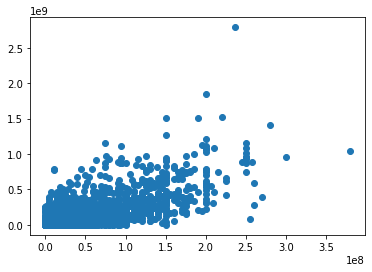

In [16]:
#let us also find out relationship between budget and revenue

plt.scatter(eda_df['budget'],eda_df['revenue'])

<BarContainer object of 10 artists>

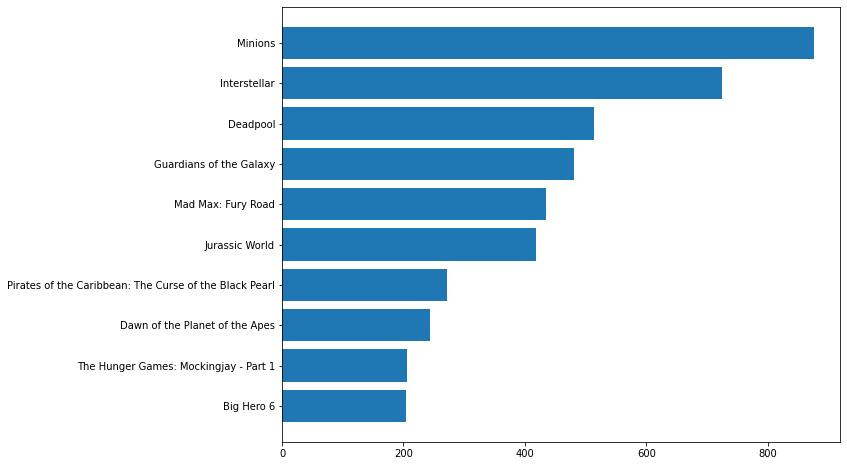

In [17]:
#let us see which movie is popular over all the years in the dataset
plt.subplots(figsize=(10,8))
plt.gca().invert_yaxis()
plt.barh(sorted_popularity['original_title'].head(10),sorted_popularity['popularity'].head(10))

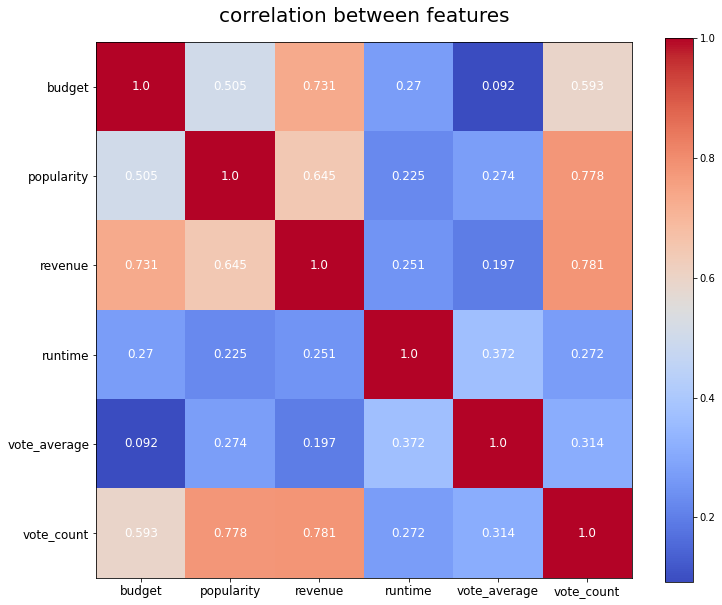

In [18]:
#let us find out the correlation between the features
matrix = eda_df[["budget", "popularity", "revenue", "runtime", "vote_average", "vote_count"]].corr()
f, ax = plt.subplots(figsize=(12, 10))
plt.title("correlation between features", fontsize=20, pad=20)
plt.xticks(range(len(matrix.index)), matrix.index, fontsize=12)
plt.yticks(range(len(matrix.index)), matrix.index, fontsize=12)

# adding values
for i in range(len(matrix.index)):
    for j in range(len(matrix.index)):
        text = ax.text(j, i, round(matrix.iloc[i, j],3), ha="center", va="center", color="w", fontsize=12)
    
plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

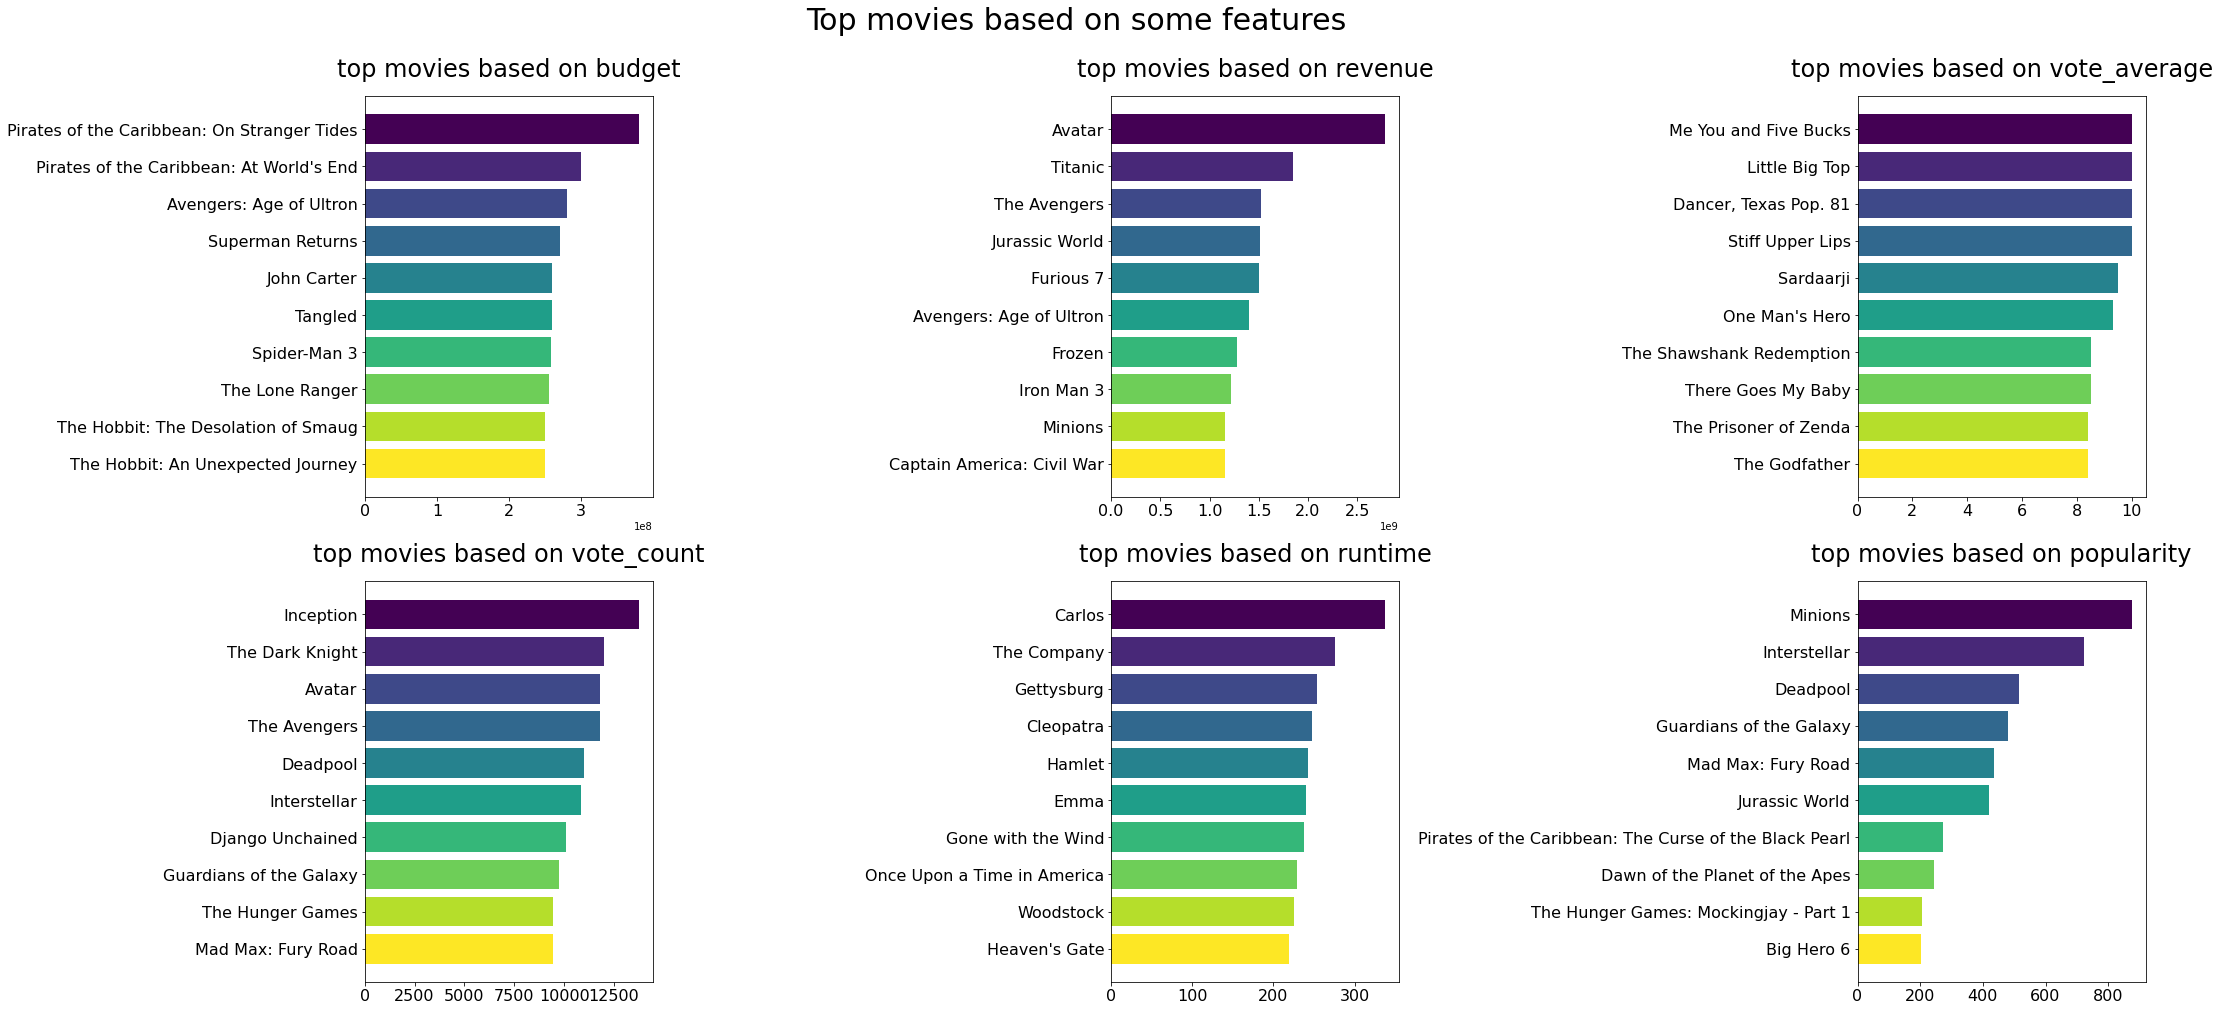

In [19]:
top_movie_num = 10
top_movies_based_on = ["budget", "revenue","vote_average", "vote_count", "runtime","popularity"]

fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(30,14))
colors = plt.cm.get_cmap('viridis', top_movie_num)

for i, col in enumerate(top_movies_based_on):
    top_movies_by = eda_df.sort_values(by=[col], ascending=False).head(top_movie_num)
    r, c = i//3, i%3
    ax[r][c].barh(top_movies_by["original_title"], top_movies_by[col], color=colors.colors)
    ax[r][c].set_title(f"top movies based on {col}", fontsize=24, pad=20)
    ax[r][c].tick_params(axis='both', which='major', labelsize=16)
    ax[r][c].invert_yaxis()    
    
plt.suptitle('Top movies based on some features',fontsize=30, y=1)
fig.tight_layout()

let us start building the recommender system

There are basically three types of recommender systems

1. Demographic filtering
2. Content based filtering
3. Collaborative filtering

Let us start with demographic filtering

### Demographic filtering

In [20]:
#we will give rating for each movie using IMDB's weighted rating formula
mean=movies_df['vote_average'].mean()
print(mean)
min_votes=movies_df['vote_count'].quantile(0.9)
print(min_votes)

6.092171559442016
1838.4000000000015


In [21]:
#caluculate the weighted rating for each movie
weighted_movies = movies_df.copy().loc[movies_df['vote_count'] >= min_votes]
print(weighted_movies.shape)
weighted_movies['weighted_rating']= weighted_movies.apply(lambda x:(x['vote_count']/(x['vote_count']+min_votes) * x['vote_average']) + (min_votes/(min_votes+x['vote_count']) * mean), axis=1)
weighted_movies.sort_values(by=['weighted_rating'],ascending=False)
weighted_movies[['original_title', 'vote_count', 'vote_average', 'weighted_rating']].head(10)

(481, 23)


,original_title,vote_count,vote_average,weighted_rating
0,Avatar,11800,7.2,7.050669
1,Pirates of the Caribbean: At World's End,4500,6.9,6.665696
2,Spectre,4466,6.3,6.239396
3,The Dark Knight Rises,9106,7.6,7.346721
4,John Carter,2124,6.1,6.096368
5,Spider-Man 3,3576,5.9,5.965250
6,Tangled,3330,7.4,6.934805
7,Avengers: Age of Ultron,6767,7.3,7.041968
8,Harry Potter and the Half-Blood Prince,5293,7.4,7.062856
9,Batman v Superman: Dawn of Justice,7004,5.7,5.781535


In [22]:
movies = movies_df[['id','original_title','overview','genres','cast','keywords','crew']]
movies.head()

,id,original_title,overview,genres,cast,keywords,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
movies.isnull().sum()

id                0
original_title    0
overview          3
genres            0
cast              0
keywords          0
crew              0
dtype: int64

In [24]:
movies.dropna(inplace=True) 

C:\Users\garra\AppData\Local\Temp\ipykernel_25140\1277003446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=True)


In [25]:
#preprocessing the data
import ast
def convert(obj):
    List = []
    for i in ast.literal_eval(obj):
        List.append(i['name'])
    return List
movies_df['genres'] = movies_df['genres'].apply(convert)
movies_df['keywords'] = movies_df['keywords'].apply(convert)

In [26]:
#function to extract top 3 actors from the cast column
def extract_top3actors(obj):
    List = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter !=3:
            List.append(i['name'])
            counter+=1
        else:
            break
    return List
movies_df['cast'] = movies_df['cast'].apply(extract_top3actors)

In [27]:
#extract director from movie
def extract_director(obj):
    List = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            List.append(i['name'])
            break
    return List
movies_df['crew'] = movies_df['crew'].apply(extract_director)

In [28]:
# Splitting the text in the overwiew column
movies['overview'] = movies['overview'].apply(lambda x:x.split())

C:\Users\garra\AppData\Local\Temp\ipykernel_25140\1147719149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['overview'] = movies['overview'].apply(lambda x:x.split())


In [29]:
#print first 5 rows
movies.head()

,id,original_title,overview,genres,cast,keywords,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [30]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

C:\Users\garra\AppData\Local\Temp\ipykernel_25140\324806532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
C:\Users\garra\AppData\Local\Temp\ipykernel_25140\324806532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
C:\Users\garra\AppData\Local\Temp\ipykernel_25140\324806532.py:3: SettingWithCopyWarning: 
A value is trying to be set

### Content based filtering

In [31]:
#combine all rows to create a single string
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

C:\Users\garra\AppData\Local\Temp\ipykernel_25140\2491087305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']


In [32]:
movies2=movies[['id','original_title','tags']]

In [33]:
#print first 5 rows of the dataframe
movies2.head(5)

,id,original_title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [34]:
#join all the tags in a single string
pd.options.mode.chained_assignment = None
movies2['tags'] = movies2['tags'].apply(lambda x:" ".join(x))

In [35]:
#lower casing all the alphabets in the tags column
movies2['tags'] = movies2['tags'].apply(lambda x:x.lower())

In [36]:
#Text Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [37]:
vectors = cv.fit_transform(movies2['tags']).toarray()

In [38]:
#initialize stemmer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [39]:
#function to apply stemming on the tags
def stem(text):
    a=[]
    for i in text.split():
        a.append(ps.stem(i))
    return " ".join(a)

In [40]:
#applty stemming on the tags dataframe
movies2['tags'] = movies2['tags'].apply(stem)

In [44]:
# Measuring similarity between Movies using cosine distance
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel,sigmoid_kernel
similarity1 = cosine_similarity(vectors)
similarity2=linear_kernel(vectors)
similarity3=sigmoid_kernel(vectors)

In [45]:
def recommend_me(movie,similarity):
    movie_index = movies2[movies2['original_title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:11]
    for i in movies_list:
        print(movies2.iloc[i[0]].original_title)

In [46]:
print("\n\nRecommendation based on cosine similarity")
recommend_me('Batman',similarity1)
print("\n\nRecommendation based on linear kernel")
recommend_me('Batman',similarity2)
print("\n\nRecommendation based on sigmoid kernel")
recommend_me('Batman',similarity3)



Recommendation based on cosine similarity
The Dark Knight Rises
Batman & Robin
Batman Begins
Hobo with a Shotgun
Batman Forever
Enemy at the Gates
Wicked Blood
Batman v Superman: Dawn of Justice
The Thief and the Cobbler
Dune


Recommendation based on linear kernel
The Dark Knight Rises
The Thief and the Cobbler
Hobo with a Shotgun
Batman & Robin
Batman Forever
Batman v Superman: Dawn of Justice
The Dark Knight
Batman Begins
Batman Returns
The Manchurian Candidate


Recommendation based on sigmoid kernel
The Dark Knight Rises
The Thief and the Cobbler
Hobo with a Shotgun
Batman & Robin
Batman Forever
Batman v Superman: Dawn of Justice
The Dark Knight
Batman Begins
Batman Returns
The Manchurian Candidate


In [47]:
import numpy as np
import pandas as pd
import nltk
nltk.download(["punkt","stopwords","wordnet",'omw-1.4'])
movies = pd.read_csv("../dataset/movies.csv")
ratings = pd.read_csv("../dataset/ratings.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\garra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\garra\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### collaborative filtering

In [48]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [50]:
df = pd.merge(ratings,movies,on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [51]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [52]:
combine_movie_rating = df.dropna(axis = 0, subset = ['title'])
movie_ratingCount = (combine_movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
movie_ratingCount.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [53]:
rating_with_totalRatingCount = combine_movie_rating.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head()

,userId,movieId,rating,timestamp,title,genres,totalRatingCount
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215


In [54]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
movie_ratingCount['totalRatingCount'].describe()

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64

In [55]:
popularity_threshold = 50
rating_popular_movie= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,userId,movieId,rating,timestamp,title,genres,totalRatingCount
0,1,1,4.000,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
1,5,1,4.000,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
2,7,1,4.500,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
3,15,1,2.500,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215
4,17,1,4.500,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215


In [56]:
rating_popular_movie.shape

(41362, 7)

In [57]:
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


In [58]:
from scipy.sparse import csr_matrix

movie_features_df_matrix = csr_matrix(movie_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(metric='cosine')

In [59]:
movie_features_df.shape

(450, 606)

In [60]:
#pick a random movie from the dataset to search for the similar movies
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 10)

237


In [61]:
#print first 5 rows of the dataframe
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,3.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
12 Angry Men (1957),0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,...,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2001: A Space Odyssey (1968),0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,...,0.000,0.000,5.000,0.000,0.000,5.000,0.000,3.000,0.000,4.500
28 Days Later (2002),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.500,0.000,5.000
300 (2007),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,...,0.000,0.000,0.000,0.000,3.000,0.000,0.000,5.000,0.000,4.000


In [62]:
#Get Recommmendations for the above queried movies
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Lady and the Tramp (1955):

1: Little Mermaid, The (1989), with distance of 0.45904386192636715:
2: Jungle Book, The (1967), with distance of 0.4851555345656041:
3: Mary Poppins (1964), with distance of 0.49730312181197156:
4: Fantasia (1940), with distance of 0.5006730852408277:
5: Honey, I Shrunk the Kids (1989), with distance of 0.5152813865432877:
6: Beetlejuice (1988), with distance of 0.5278258431382531:
7: Wizard of Oz, The (1939), with distance of 0.5322345745157117:
8: Bug's Life, A (1998), with distance of 0.5393671662249445:
9: Hook (1991), with distance of 0.5424758433020649:
